#**Gather Data**

Data Source: https://www.kaggle.com/datasets/abdallahwagih/amazon-reviews/code

In [1]:
#Mounts Google Drive to the current Google Colab session for file access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import packages
import pandas as pd
from ast import literal_eval

In [48]:
# Import the JOSN file 'Cell_Phones_and_Accessories_5.json' into a DataFrame
df = pd.read_json('/content/drive/MyDrive/5610/Cell_Phones_and_Accessories_5.json', lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [50]:
#only play with 10000 rows
df = df.sample(n=10000, random_state=42)


#**Pre-process**

In [51]:
# Capitalize the first letter of each column name
df.columns = [col.capitalize() for col in df.columns]

# Remove the columns 'Helpful' and 'Unixreviewtime' from the DataFrame
df = df.drop(columns=['Helpful', 'Unixreviewtime',"Reviewername","Asin","Summary"])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 156187 to 66990
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reviewerid  10000 non-null  object
 1   Reviewtext  10000 non-null  object
 2   Overall     10000 non-null  int64 
 3   Reviewtime  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 390.6+ KB


In [53]:
df.head(2)

,Reviewerid,Reviewtext,Overall,Reviewtime
156187,A1P3ACSVXZ1JUM,iBOLT xProDock Active Car Dock/Holder/Mount fo...,5,"06 24, 2013"
102252,A2Z3IZDQUIDRR9,This pouch is everything that I was looking fo...,5,"02 23, 2013"


**Common pre-processing**

In [58]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

df[['Reviewtext']] = df[['Reviewtext']].applymap(clean_text_round1)

df.head(2)

,Reviewerid,Reviewtext,Overall,Reviewtime
156187,A1P3ACSVXZ1JUM,ibolt xprodock active car dockholdermount for ...,5,"06 24, 2013"
102252,A2Z3IZDQUIDRR9,this pouch is everything that i was looking fo...,5,"02 23, 2013"


**Second round of cleaning**

In [60]:

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

df[['Reviewtext']] = df[['Reviewtext']].applymap(clean_text_round2)
df.head()

,Reviewerid,Reviewtext,Overall,Reviewtime
156187,A1P3ACSVXZ1JUM,ibolt xprodock active car dockholdermount for ...,5,"06 24, 2013"
102252,A2Z3IZDQUIDRR9,this pouch is everything that i was looking fo...,5,"02 23, 2013"
23146,A3EOVXI1VZIHUQ,first of all the case i had on my iphone pre...,3,"02 2, 2011"
86461,AWU526GBZ64MH,i ordered this case because i had the same cas...,5,"09 20, 2013"
62407,A3F7F7QKQP2FKT,bought a few of these as gifts they were a big...,5,"06 22, 2013"


In [61]:
# Drop rows with missing values
df_cleaned = df.dropna(how='any')

df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 156187 to 66990
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reviewerid  10000 non-null  object
 1   Reviewtext  10000 non-null  object
 2   Overall     10000 non-null  int64 
 3   Reviewtime  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 390.6+ KB


,Overall
count,10000.000000
mean,4.138300
std,1.221361
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


The average rating is approximately 4.15, suggesting that a majority of the reviews are positive.

50% of the ratings (median) are 5, further supporting the observation of predominantly positive reviews.

In conclusion, the products generally receive favorable reviews, with a significant majority being highly positive.

#**Data Exploration**


**Number of reviews each year**

In [62]:
df_cleaned_sorted = df_cleaned.copy()
df_cleaned_sorted['Reviewtime'] = pd.to_datetime(df_cleaned_sorted['Reviewtime'], format='%m %d, %Y')
df_cleaned_sorted = df_cleaned_sorted.sort_values(by="Reviewtime")

df_cleaned_sorted

,Reviewerid,Reviewtext,Overall,Reviewtime
597,A1QNYLBG73QRNF,this phone is flashy and feels good in the han...,2,2004-06-18
611,A20WAT2B0MSEG9,i tried this out because my old bluetrek that ...,1,2004-08-24
775,A1N03V52IRZ5PR,i give it five stars despite some technical p...,5,2004-12-13
632,A33FS5H3CPDR6D,this might be the most comfortable bluetooth h...,2,2005-01-11
896,A952LJOXPLTVL,i bought this becasue i was very happy to see ...,4,2005-02-16
...,...,...,...,...
168793,A35N8F5V2PELR9,finding a durable attractive and costconscious...,5,2014-07-22
177263,A2MUVUJZ7SSVVM,its a great accesory it allows you to do many ...,4,2014-07-22
174205,A3HFDVV0QFC4Q4,horrible case,1,2014-07-23
193006,A2REF6V5JJE6X3,the soft part in the back has started peeling ...,2,2014-07-23


**The average number of reviews per month each year**

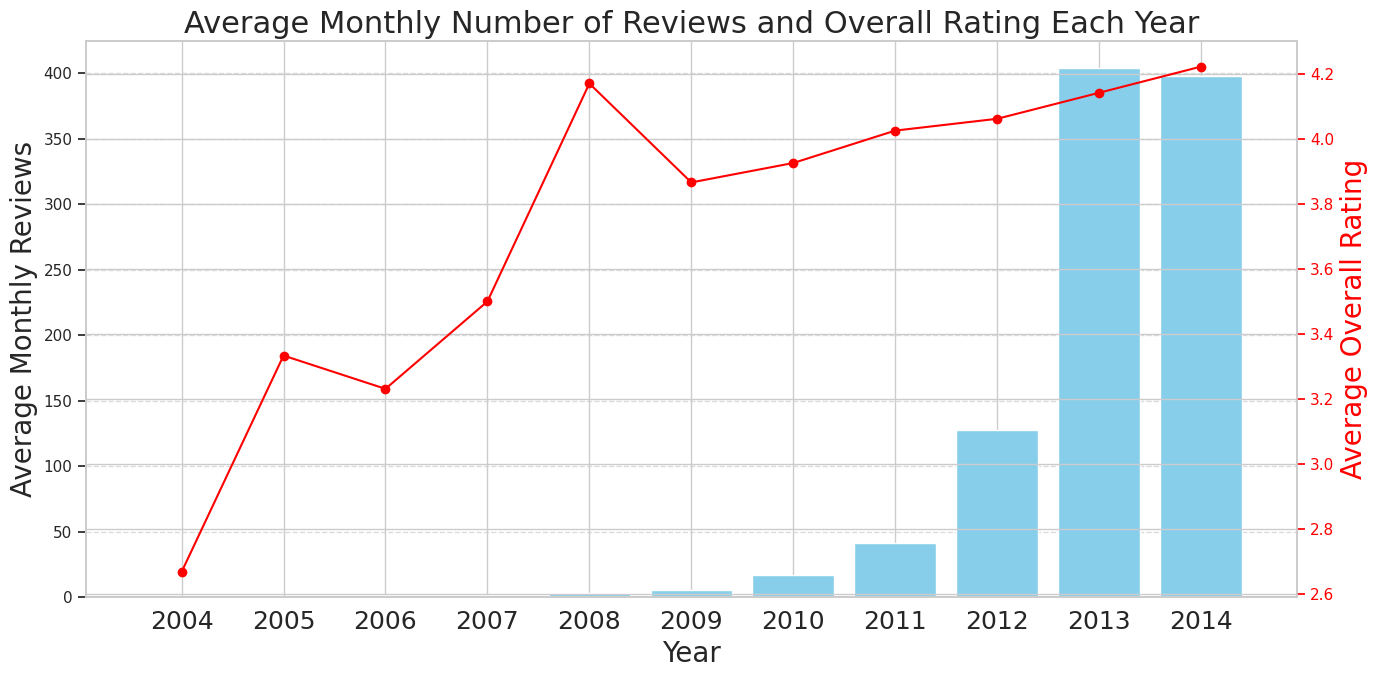

In [70]:
import matplotlib.pyplot as plt
df_cleaned_sorted['Year'] = df_cleaned_sorted['Reviewtime'].dt.year
df_cleaned_sorted['Month'] = df_cleaned_sorted['Reviewtime'].dt.month
avg_yearly_rating = df_cleaned_sorted.groupby('Year')['Overall'].mean().reset_index()

# Extract year and month from the 'Reviewtime' column
df_cleaned_sorted['Year'] = df_cleaned_sorted['Reviewtime'].dt.year
df_cleaned_sorted['Month'] = df_cleaned_sorted['Reviewtime'].dt.month

# Group by year and month and count the number of reviews
monthly_reviews = df_cleaned_sorted.groupby(['Year', 'Month']).size().reset_index(name='ReviewCount')

# Calculate the average number of reviews per month for each year
avg_monthly_reviews = monthly_reviews.groupby('Year')['ReviewCount'].mean().reset_index()

# Plotting the average number of monthly reviews and average rating
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(14, 7))
plt.bar(avg_monthly_reviews['Year'], avg_monthly_reviews['ReviewCount'], color='skyblue', label='Average Monthly Reviews')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average Monthly Reviews', fontsize=20)
plt.title('Average Monthly Number of Reviews and Overall Rating Each Year', fontsize=22)
plt.xticks(avg_monthly_reviews['Year'],fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the line chart for average rating
ax2 = plt.gca().twinx()  # instantiate a second y-axis
ax2.plot(avg_yearly_rating['Year'], avg_yearly_rating['Overall'], color='red', marker='o', label='Average Overall Rating')
ax2.set_ylabel('Average Overall Rating', color='red', fontsize=20)
ax2.tick_params(axis='y', colors='red')

plt.tight_layout()
plt.show()



**Number of words: find the number of words that each review uses**


In [71]:
df_cleaned['Wordnumber'] = df_cleaned['Reviewtext'].apply(lambda x: len(str(x).split()))
df_cleaned.head()


,Reviewerid,Reviewtext,Overall,Reviewtime,Wordnumber
156187,A1P3ACSVXZ1JUM,ibolt xprodock active car dockholdermount for ...,5,"06 24, 2013",96
102252,A2Z3IZDQUIDRR9,this pouch is everything that i was looking fo...,5,"02 23, 2013",73
23146,A3EOVXI1VZIHUQ,first of all the case i had on my iphone pre...,3,"02 2, 2011",207
86461,AWU526GBZ64MH,i ordered this case because i had the same cas...,5,"09 20, 2013",39
62407,A3F7F7QKQP2FKT,bought a few of these as gifts they were a big...,5,"06 22, 2013",31


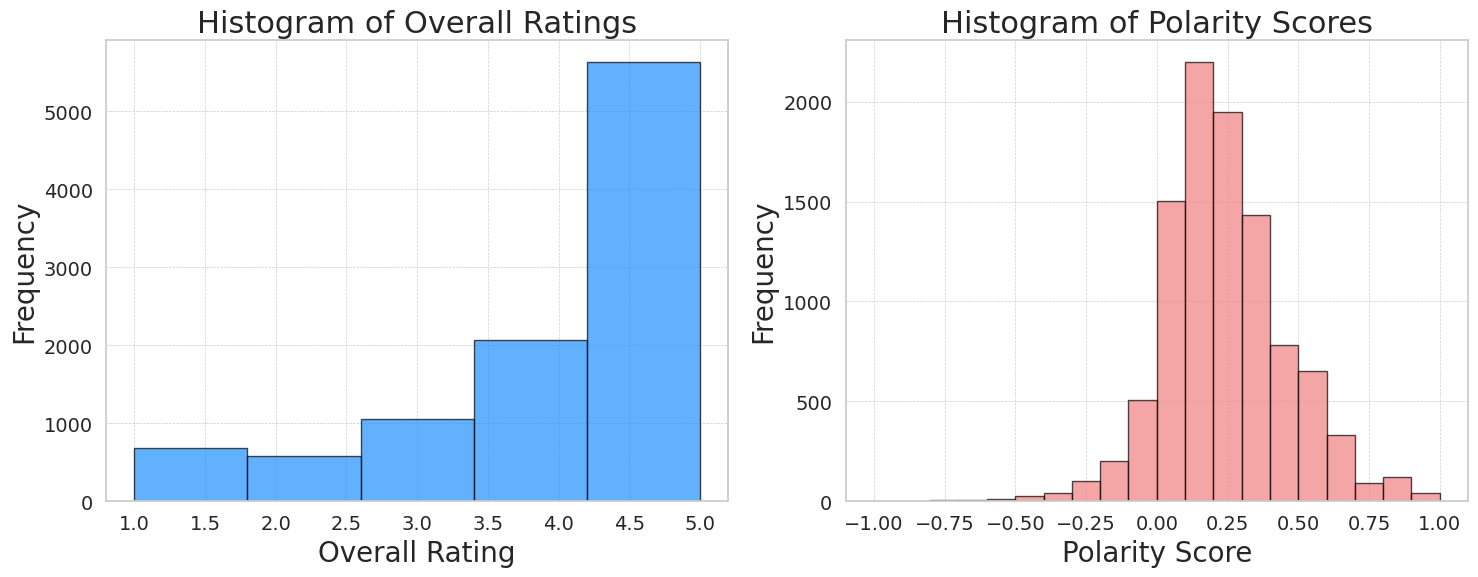

In [75]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity


df_cleaned_sorted['Polarity'] = df_cleaned_sorted['Reviewtext'].apply(pol)
df_cleaned_sorted.head()
# Plotting histograms for Overall ratings and Polarity scores
plt.figure(figsize=(15, 6))

# Histogram for Overall ratings
plt.subplot(1, 2, 1)
plt.hist(df_cleaned_sorted['Overall'], bins=5, color='dodgerblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Overall Ratings',fontsize=22)
plt.xlabel('Overall Rating',fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel('Frequency',fontsize=20)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Histogram for Polarity scores
plt.subplot(1, 2, 2)
plt.hist(df_cleaned_sorted['Polarity'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Polarity Scores',fontsize=22)
plt.xlabel('Polarity Score',fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel('Frequency',fontsize=20)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [80]:
df_cleaned_sorted.head(3)

,Reviewerid,Reviewtext,Overall,Reviewtime,Year,Month,Polarity
597,A1QNYLBG73QRNF,this phone is flashy and feels good in the han...,2,2004-06-18,2004,6,0.207653
611,A20WAT2B0MSEG9,i tried this out because my old bluetrek that ...,1,2004-08-24,2004,8,0.159722
775,A1N03V52IRZ5PR,i give it five stars despite some technical p...,5,2004-12-13,2004,12,0.176190


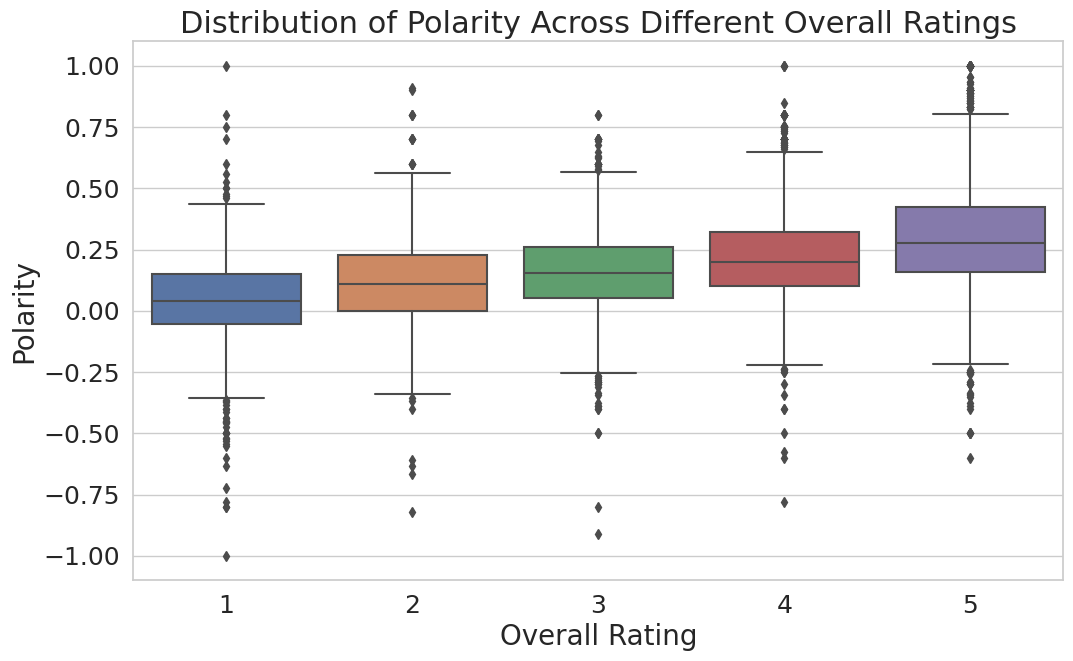

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a boxplot of Polarity grouped by Overall rating
plt.figure(figsize=(12, 7))
sns.boxplot(x="Overall", y="Polarity", data=df_cleaned_sorted)

plt.title("Distribution of Polarity Across Different Overall Ratings",fontsize=22)
plt.xlabel("Overall Rating",fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel("Polarity",fontsize=20)
plt.yticks(fontsize=18)
plt.show()

**Top words used by each reviewer.**

**The top 25 words that appear most frequently in the entire set of Reviewtext **

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


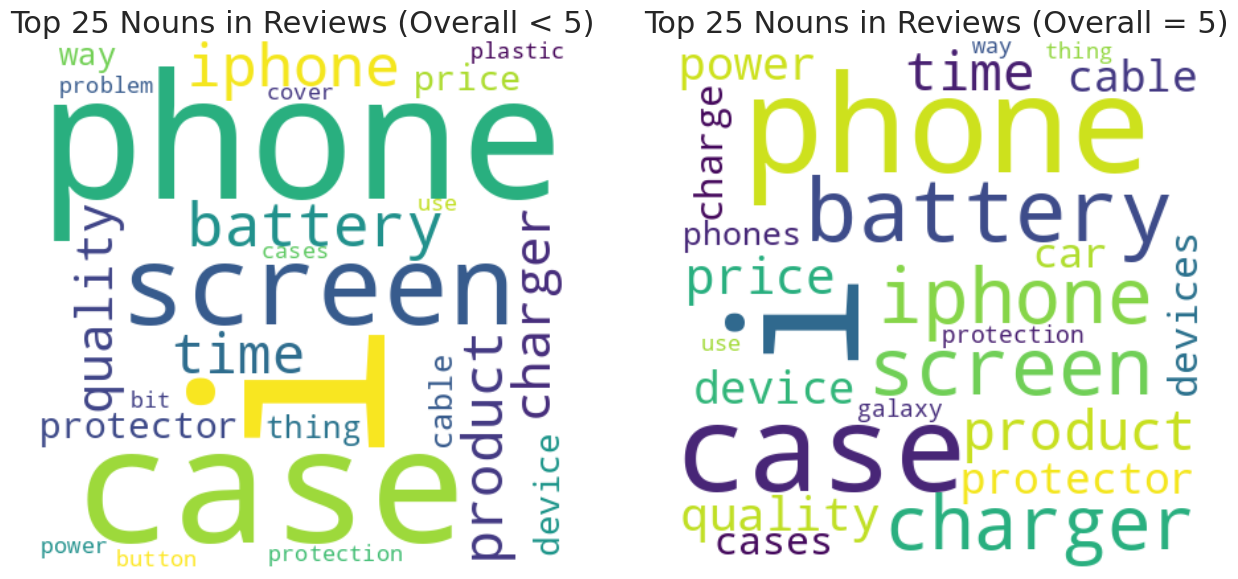

In [78]:
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure that the necessary nltk resources are downloaded
nltk.download('averaged_perceptron_tagger')

def extract_nouns_from_text(text):
    # Tokenize and filter stopwords
    words = text.split()
    filtered_words = [word for word in words ]

    # POS tagging
    tagged_words = pos_tag(filtered_words)

    # Filter nouns
    nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS']]

    return nouns

# Filter out reviews with 'Overall' less than 5
less_than_5_reviews_text = ' '.join(df_cleaned_sorted[df_cleaned_sorted['Overall'] < 5]['Reviewtext'])
nouns_less_than_5 = extract_nouns_from_text(less_than_5_reviews_text)
word_freq_less_than_5 = Counter(nouns_less_than_5)
top_25_nouns_less_than_5 = dict(word_freq_less_than_5.most_common(25))

# Filter out reviews with 'Overall' equal to 5
equal_5_reviews_text = ' '.join(df_cleaned_sorted[df_cleaned_sorted['Overall'] == 5]['Reviewtext'])
nouns_equal_5 = extract_nouns_from_text(equal_5_reviews_text)
word_freq_equal_5 = Counter(nouns_equal_5)
top_25_nouns_equal_5 = dict(word_freq_equal_5.most_common(25))

# Creating the word clouds
wordcloud_less_than_5 = WordCloud(background_color="white", width=400, height=400).generate_from_frequencies(top_25_nouns_less_than_5)
wordcloud_equal_5 = WordCloud(background_color="white", width=400, height=400).generate_from_frequencies(top_25_nouns_equal_5)

# Plotting the word clouds side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(wordcloud_less_than_5, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Top 25 Nouns in Reviews (Overall < 5)", fontsize=22)

ax[1].imshow(wordcloud_equal_5, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Top 25 Nouns in Reviews (Overall = 5)", fontsize=22)

plt.show()


In [18]:
top_25_nouns_less_than_5
top_25_nouns_equal_5
shared_words = set(top_25_nouns_less_than_5).intersection(top_25_nouns_equal_5)
unique_to_less_than_5 = set(top_25_nouns_less_than_5) - set(top_25_nouns_equal_5)
unique_to_equal_5 = set(top_25_nouns_equal_5) - set(top_25_nouns_less_than_5)
print(shared_words)
print(unique_to_less_than_5)
print(unique_to_equal_5)

{'way', 'use', 'device', 'phone', 'i', 'cases', 'battery', 'thing', 'cable', 'time', 'protection', 'quality', 'charger', 'power', 'case', 'iphone', 'product', 'price', 'screen', 'protector'}
{'bit', 'cover', 'plastic', 'button', 'problem'}
{'galaxy', 'car', 'devices', 'charge', 'phones'}
